In [1]:
import numpy as np
import matplotlib.pyplot as plt

from lib.utils import load_dataset, plot_image
from lib.network import NeuralNetworkClassifier

from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [2]:
# Load data
X_train_orig, y_train, X_test_orig, y_test, classes = load_dataset()

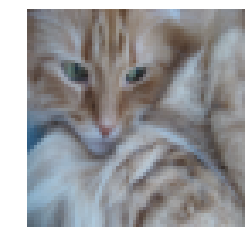

In [3]:
plot_image(X_train_orig, y_train, 2)

In [4]:
X_train_orig.shape

(209, 64, 64, 3)

In [5]:
y_train.shape

(209,)

In [6]:
n_samples_train = X_train_orig.shape[0]
n_samples_test = X_test_orig.shape[0]
X_train_flattern = X_train_orig.reshape(n_samples_train, -1)
X_test_flattern = X_test_orig.reshape(n_samples_test, -1)

In [7]:
X_train_flattern.shape

(209, 12288)

In [8]:
X_train = X_train_flattern / 255.
X_teset = X_test_flattern / 255.

In [9]:
y_train.shape

(209,)

In [10]:
X_train

array([[0.06666667, 0.12156863, 0.21960784, ..., 0.        , 0.        ,
        0.        ],
       [0.76862745, 0.75294118, 0.74509804, ..., 0.32156863, 0.31372549,
        0.31764706],
       [0.32156863, 0.27843137, 0.26666667, ..., 0.54117647, 0.55294118,
        0.55686275],
       ...,
       [0.56078431, 0.60784314, 0.64705882, ..., 0.33333333, 0.41960784,
        0.58431373],
       [0.08627451, 0.09411765, 0.09019608, ..., 0.01568627, 0.01960784,
        0.        ],
       [0.03137255, 0.10980392, 0.20784314, ..., 0.        , 0.        ,
        0.        ]])

In [11]:
layers_dims = [12288, 20, 7, 5, 1]

In [12]:
nn = NeuralNetworkClassifier(layer_dims=layers_dims, max_iter=2500, learning_rate=0.0075)

In [13]:
nn.fit(X_train, y_train)

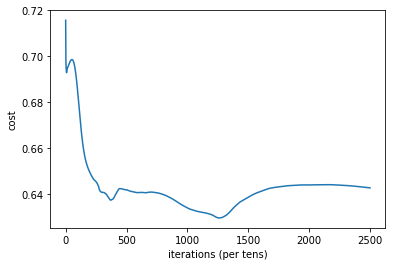

In [14]:
plt.plot(nn.costs)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [15]:
len(nn.costs)

2500

In [16]:
for i, cost in enumerate(nn.costs):
    if i % 100 == 0:
        print(cost)

0.7157315134137129
0.6838812999435286
0.6493197902370836
0.6408164197332553
0.6388737019379487
0.6418860196696916
0.6406924301523078
0.6409387807417113
0.6398995899185869
0.6371951791729852
0.6340389579221186
0.632335756460015
0.6310799210416477
0.6302955533345688
0.6351766349381679
0.638750584905721
0.6411972487729877
0.6428204165569498
0.6435748666754995
0.6439787823332749
0.6440495806279176
0.6441370069830417
0.6440990290696064
0.6438123286930906
0.6433461517095752


In [18]:
accuracy = nn.get_accuracy(X_teset, y_test)
accuracy

0.34